## Laboratory 3 - Bayesian Inference ##

# Exercise 1 #

The number of particles emitted by a radioactive source during a fixed interval of time
(∆t = 10 s) follows a Poisson distribution on the parameter µ. The number of particles
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3. 

(a) assuming a positive uniform prior distribution for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R 

Poisson likelihood for a single measurement:
$$
f(y \mid \mu)=\frac{\mu^{y} \mathrm{e}^{-\mu}}{y!}
$$

For multiple measurements:
$$
f\left(\left\{y_{j}\right\} \mid \mu\right)=\prod_{j=1}^{n} f\left(y_{j} \mid \mu\right) \quad 

In [1]:
# Load required libraries
library(ggplot2)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


mean_u 3.000000
Median 2.950000
Variance 0.521241


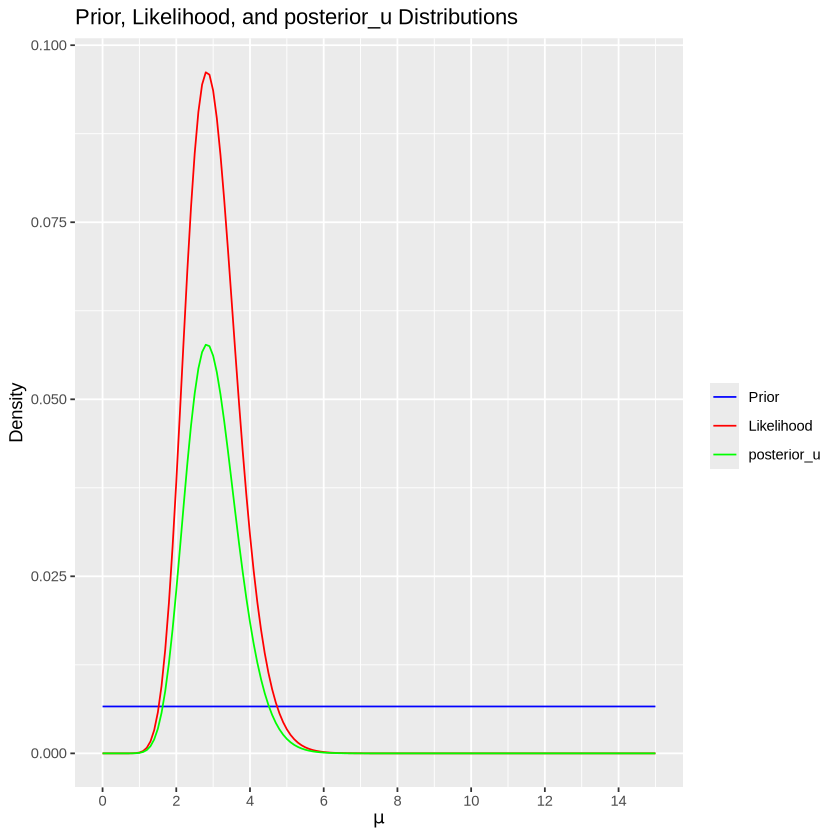

In [2]:
# Define the observed data
data = c(4, 1, 3, 1, 5, 3)
mu_values = seq(0, max(data) + 10, by = 0.1)

# Define the likelihood function for Poisson distribution
likelihood = dpois(sum(data), lambda = mu_values * length(data))

# Define the prior distribution (positive uniform)
prior = replicate(length(mu_values), 1 / length(mu_values))

# Define the posterior distribution (proportional to likelihood * prior)
posterior_u = (likelihood * prior)

# Normalize the posterior
posterior_u = posterior_u / sum(posterior_u) 

# Organize the data in a dataframe
df = data.frame(mu = mu_values, posterior_u = posterior_u, prior = prior, likelihood = likelihood)
#df
ggplot(df, aes(x = mu, y = prior)) +
      ylim(0, max(likelihood)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = likelihood, aes(color = 'green')) +
      geom_line(y = posterior_u, aes(color = 'red')) +
      labs(title = "Prior, Likelihood, and posterior Distributions",
            x = expression(mu),
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red", "green"), labels = c("Prior", "Likelihood", "Posterior")) +
      scale_x_continuous(breaks = seq(0, 15, 2))

# Calculate mean, median and variance analitically
mean_u = wtd.mean(mu_values, posterior_u, normwt=TRUE)
median_u = wtd.quantile(mu_values, posterior_u, probs=0.5, normwt=TRUE)
var_u = wtd.var(mu_values, posterior_u, normwt=TRUE)

cat(sprintf("mean_u %f\n", mean_u))
cat(sprintf("Median %f\n", median_u))
cat(sprintf("Variance %f\n", var_u))

(b) assuming a Gamma prior such that the expected value is µ = 3 with a standard
deviation σ = 1,
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R. 

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Mean 2.888889
Median 2.900000
Variance 0.338068


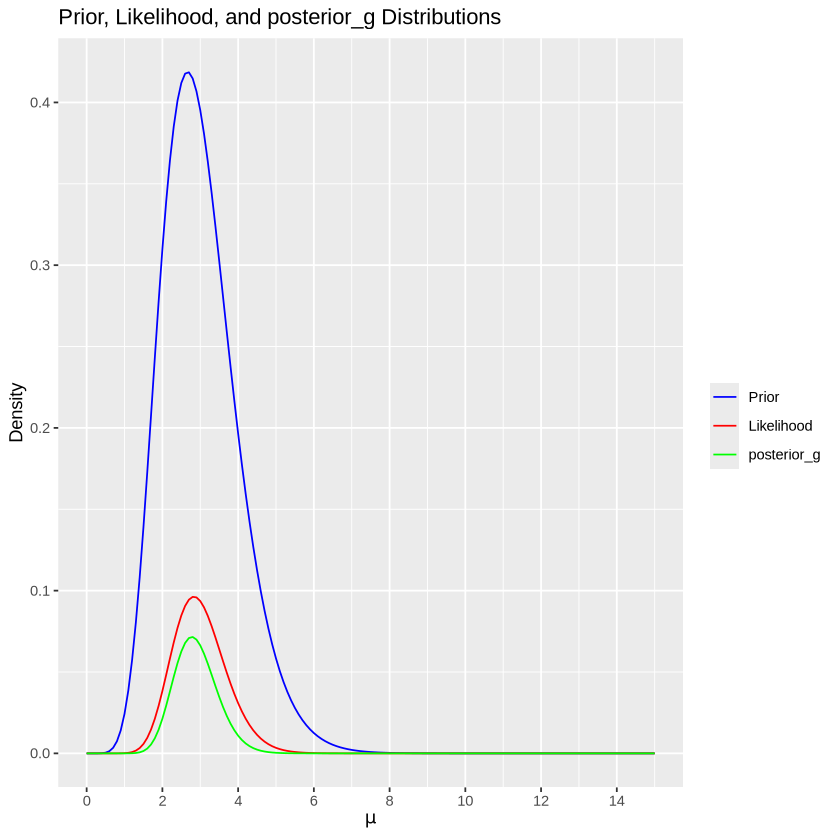

In [3]:
# Define the observed data
data = c(4, 1, 3, 1, 5, 3)
mu_values = seq(0, max(data) + 10, by = 0.1)

# Define the likelihood function for Poisson distribution
likelihood = dpois(sum(data), lambda = mu_values * length(data))
#print(paste("LIkelihood:", likelihood))

# Define the prior distribution 
prior = dgamma(mu_values, shape= 9, scale= 1/3)

# Define the posteriordistribution (proportional to likelihood * prior)
posterior_g = (likelihood * prior)

# Normalize the posterior
posterior_g = posterior_g/ sum(posterior_g) 

# Organize the data in a dataframe
df = data.frame(mu = mu_values, posterior_g = posterior_g, prior = prior, likelihood = likelihood)

ggplot(df, aes(x = mu, y = prior)) +
      ylim(0, max(prior)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = likelihood, aes(color = 'green')) +
      geom_line(y = posterior_g, aes(color = 'red')) +
      labs(title = "Prior, Likelihood, and posterior Distributions",
            x = expression(mu),
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red", "green"), labels = c("Prior", "Likelihood", "Posterior")) +
      scale_x_continuous(breaks = seq(0, 15, 2))

# Calculate mean, median and variance 
mean_g = wtd.mean(mu_values, posterior_g, normwt=TRUE)
median_g = wtd.quantile(mu_values, posterior_g, probs=0.5, normwt=TRUE)
var_g = wtd.var(mu_values, posterior_g, normwt=TRUE)

cat(sprintf("Mean %f\n", mean_g))
cat(sprintf("Median %f\n", median_g))
cat(sprintf("Variance %f\n", var_g))

(c) evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior
distribution, with the same mean and standard deviation

In [4]:
# Uniform prior
cdf_u = cumsum(posterior_u)

# Find the lower and upper bounds of the credibility interval
lower_bound <- min(mu_values[cdf_u >= 0.025])
upper_bound <- max(mu_values[cdf_u <= 0.975])

# Display the credibility interval
cat("Uniform prior:\n")
cat("95% Credibility Interval for uniform prior:", lower_bound, "-", upper_bound, "\n")

## Approximate the posterior distribution with a normal distribution with the same mean and standard deviation
dist_u = dnorm(mu_values, mean_u, sqrt(var_u))
cdf_u = cumsum(dist_u)

# Find the lower and upper bounds of the credibility interval
lower_bound <- min(mu_values[cdf_u >= 0.025])
upper_bound <- max(mu_values[cdf_u <= 0.975])

# Display the credibility interval
cat("95% Credibility Interval with posterior approximated as normal:", lower_bound, "-", upper_bound, "\n","\n")

###########################################################################################################
# Gamma prior
cdf_g = cumsum(posterior_g)

# Find the lower and upper bounds of the credibility interval
lower_bound <- min(mu_values[cdf_g >= 0.025])
upper_bound <- max(mu_values[cdf_g <= 0.975])

# Display the credibility interval
cat("Gamma prior:\n")
cat("95% Credibility Interval:", lower_bound, "-", upper_bound, "\n")

## Approximate the posterior distribution with a normal distribution with the same mean and standard deviation
dist_g = dnorm(mu_values, mean_g, sqrt(var_g))
cdf_g = cumsum(dist_g)

# Find the lower and upper bounds of the credibility interval
lower_bound <- min(mu_values[cdf_g >= 0.025])
upper_bound <- max(mu_values[cdf_g <= 0.975])

# Display the credibility interval
cat("95% Credibility Interval with posterior approximated as normal:", lower_bound, "-", upper_bound, "\n")


Uniform prior:
95% Credibility Interval for uniform prior: 1.8 - 4.4 
95% Credibility Interval with posterior approximated as normal: 1 - 2 
 
Gamma prior:
95% Credibility Interval: 1.9 - 4 
95% Credibility Interval with posterior approximated as normal: 1.3 - 2 


# Exercise 2: Efficiency using Bayesian approach 

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorded simultaneously by Det1 and Det3, and r be those also recorded by Det2, researcher A obtains n = 500 and r = 312. 
Assuming a binomial model where n is the number of trials and r is the number of
success out of n trials, 

a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis
of:\
– uniform prior ∼ U(0,1)\
– Jeffreys prior ∼ Beta(1/2,1/2)

In [5]:
n = 500 # number of trials 
r = 312 # number of successes
space = seq(0.01, 0.99, by=0.01) # possible values of the efficency
likelihood = dbinom(r, n, prob = space) # likelihood: probability of observing the data given each possible value of the efficency

###################### UNIFORM PRIOR ###########################
prior_u = replicate(length(space), 1 / length(space))

posterior_u = likelihood * prior_u 

# Normalize the posterior
posterior_u = posterior_u / sum(posterior_u) 

# Calculate mean, median and variance analitically
mean_u = wtd.mean(space, posterior_u, normwt = TRUE)
var_u = wtd.var(space, posterior_u, normwt=TRUE)

cat("Uniform prior:\n")
cat(sprintf("Mean %f\n", mean_u))
cat(sprintf("Variance %f\n", var_u))

###################### JEFFREYS PRIOR ###########################
prior_j = dbeta(space, 0.5, 0.5)

posterior_j = likelihood * prior_j

# Normalize the posterior
posterior_j = posterior_j / sum(posterior_j)

# Calculate mean, median and variance analitically
mean_j = wtd.mean(space, posterior_j, normwt = TRUE)
var_j = wtd.var(space, posterior_j, normwt=TRUE)

cat("\nJeffreys prior:\n")
cat(sprintf("Mean %f\n", mean_j))
cat(sprintf("Variance %f\n", var_j))

Uniform prior:
Mean 0.623506
Variance 0.000537

Jeffreys prior:
Mean 0.623752
Variance 0.000538


b) Plot the posterior distributions for both cases

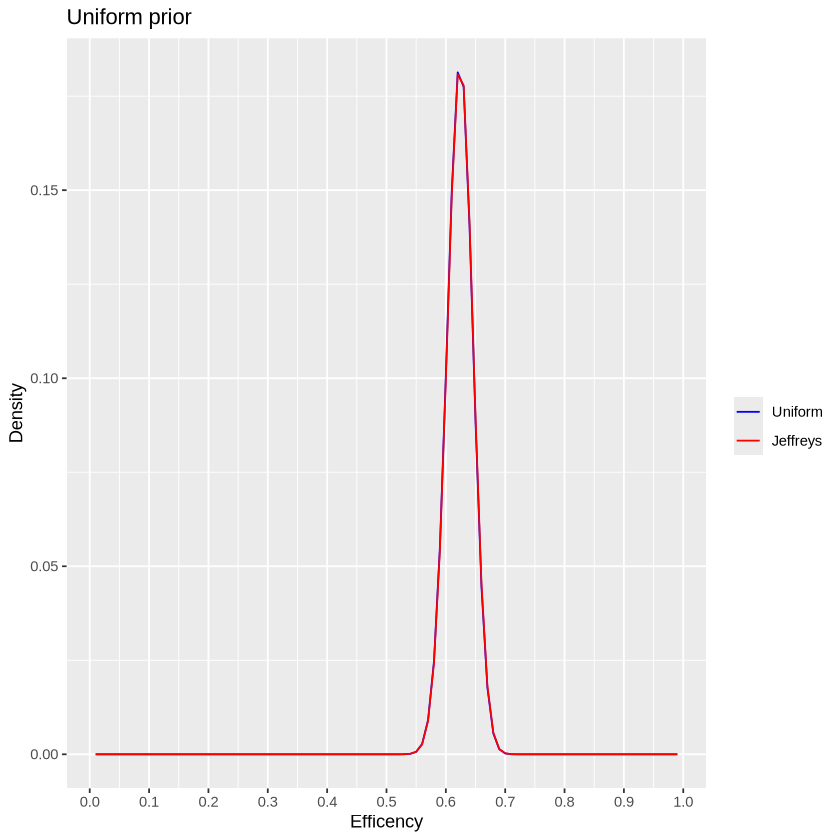

In [6]:
# Organize the data in a dataframe
df = data.frame(space = space, uniform = posterior_u, jeffreys = posterior_j)

ggplot(df, aes(x = space, y = posterior_u)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = posterior_j, aes(color = 'red')) +
      labs(title = "Uniform prior",
            x = "Efficency",
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red"), labels = c("Uniform", "Jeffreys")) +
      scale_x_continuous(breaks = seq(0, 1, 0.1))

Taking into account that the same detector has been studied by researcher B, who has
performed only n = 10 measurements and has obtained r = 10 signals 

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior
with the results of researcher B

In [7]:
n = 10
r = 10

likelihood = dbinom(r, n, prob = space)

prior = replicate(length(space), 1 / length(space))

posterior_c = likelihood * prior 

posterior_c = posterior_c / sum(posterior_c)

mean = wtd.mean(space, posterior_c, normwt = TRUE)
var = wtd.var(space, posterior_c, normwt = TRUE)

cat(sprintf("Mean %f\n", mean))
cat(sprintf("Variance %f\n", var))

Mean 0.911999
Variance 0.006166


d) Repeat the computation of points a) and b) with the data of researcher A using as a
prior the posterior obtained from point c).

Mean 0.630859
Variance 0.000523


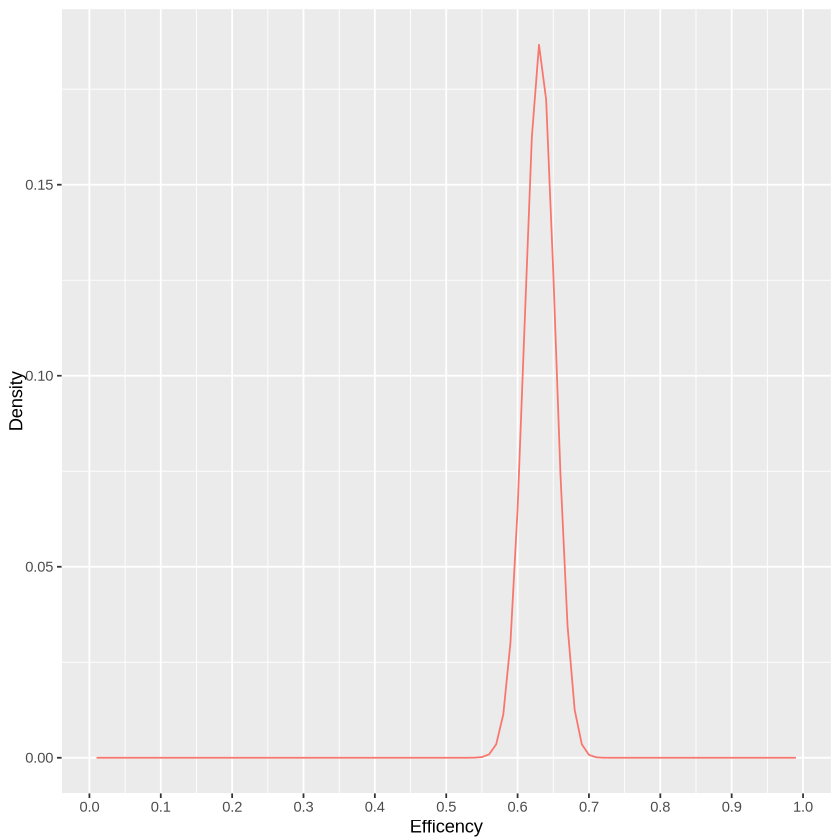

In [8]:
n = 500 # number of trials 
r = 312 # number of successes
space = seq(0.01, 0.99, by=0.01) # possible values of the efficency
likelihood = dbinom(r, n, prob = space) # likelihood: probability of observing the data given each possible value of the efficency

prior_u = posterior_c

posterior = likelihood * prior_u 

# Normalize the posterior
posterior = posterior / sum(posterior) 

# Calculate mean, median and variance analitically
mean_u = wtd.mean(space, posterior, normwt = TRUE)
var_u = wtd.var(space, posterior, normwt=TRUE)

cat(sprintf("Mean %f\n", mean_u))
cat(sprintf("Variance %f\n", var_u))

# Organize the data in a dataframe
df = data.frame(space = space, posterior = posterior)

ggplot(df, aes(x = space, y = posterior)) +
      geom_line(aes(color = 'blue'), show.legend = FALSE) +
      labs(x = "Efficency",
            y = "Density",
            color = "") +
      scale_x_continuous(breaks = seq(0, 1, 0.1))

# Exercise 3 - Bayesian Inference for Binomial model #

A coin is flipped n = 30 times with the following outcomes: 

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H, H, H

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior
distributions for the data set.

[1] 15


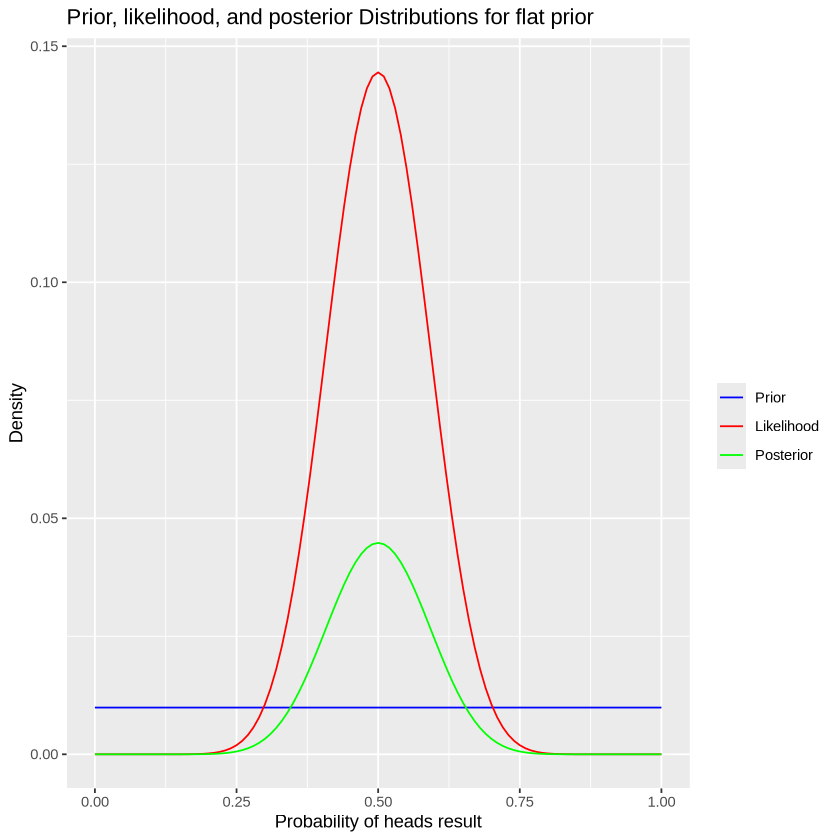

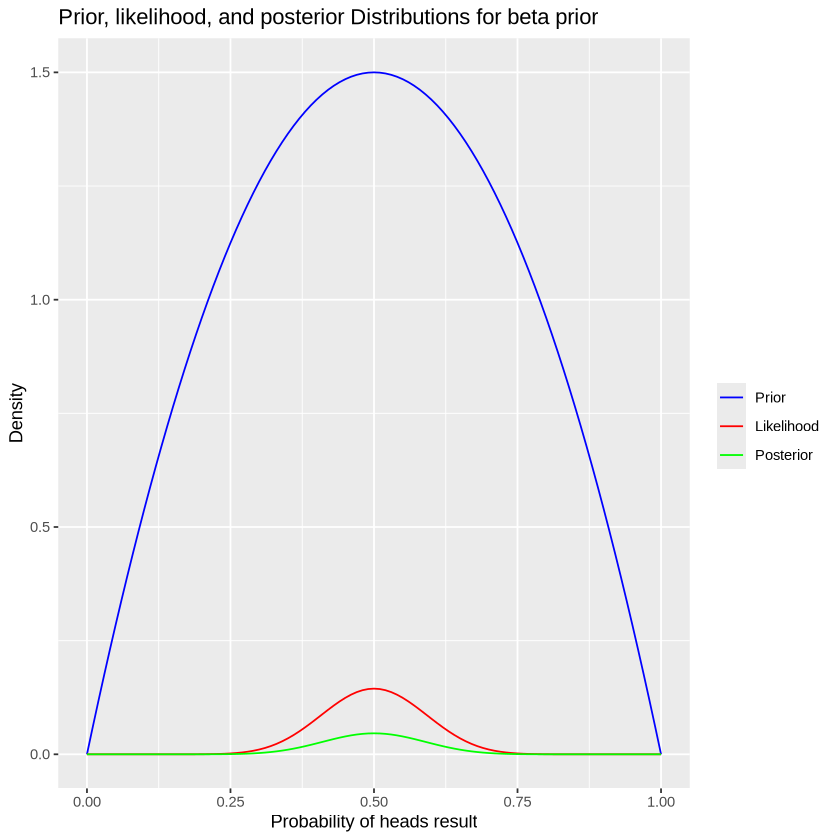

In [57]:
data = c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1)
space = seq(0, 1, 0.01)

# Count the number of heads results in the dataset
nT = sum(data)
print(nT)
likelihood = dbinom(nT, length(data), prob = space)

################# FLAT PRIOR ############################
prior_f = replicate(length(space), 1 / length(space)) 

posterior_f = likelihood * prior_f

posterior_f = posterior_f / sum(posterior_f)

# Organize the data in a dataframe
df_f = data.frame(space = space, posterior  = posterior_f, prior = prior_f, likelihood = likelihood)

ggplot(df_f, aes(x = space, y = prior_f)) +
      ylim(0, max(likelihood)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = likelihood, aes(color = 'green')) +
      geom_line(y = posterior_f, aes(color = 'red')) +
      labs(title = "Prior, likelihood, and posterior Distributions for flat prior",
            x = "Probability of heads result",
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red", "green"), labels = c("Prior", "Likelihood", "Posterior")) 


################# BETA PRIOR ############################
prior_b = dbeta(space, 2, 2)

posterior_b = likelihood * prior_b

posterior_b = posterior_b / sum(posterior_b)

# Organize the data in a dataframe
df_b = data.frame(space = space, posterior  = posterior_b, prior = prior_b, likelihood = likelihood)

ggplot(df_b, aes(x = space, y = prior_b)) +
      #ylim(0, max(likelihood)) +
      geom_line(aes(color = 'blue')) +
      geom_line(y = likelihood, aes(color = 'green')) +
      geom_line(y = posterior_b, aes(color = 'red')) +
      labs(title = "Prior, likelihood, and posterior Distributions for beta prior",
            x = "Probability of heads result",
            y = "Density",
            color = "") +
      scale_color_manual(values = c("blue", "red", "green"), labels = c("Prior", "Likelihood", "Posterior")) 

b) Evaluate the most probable value for the coin probability p and, integrating the
posterior probability distribution, give an estimate for a 95% credibility interval.

In [69]:
most_f = space[which.max(df_f$posterior)]
most_b = space[which.max(posterior_b)]
cat(sprintf("The most probable value for the coin probability p given a flat prior is p = %.2f", most_f))
cat(sprintf("\nThe most probable value for the coin probability p given a beta prior is p = %.2f", most_b))

confidence = c(0.025,0.975)
interval_f = wtd.quantile(space, posterior_f, confidence, normwt = TRUE)
interval_b = wtd.quantile(space, posterior_b, confidence, normwt = TRUE)
cat(sprintf("The 95% credibility interval for the flat prior is %.2f", interval_f))

The most probable value for the coin probability p given a flat prior is p = 0.50
The most probable value for the coin probability p given a beta prior is p = 0.50

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


ERROR: Error in sprintf("The 95% credibility interval for the flat prior is %.2f", : invalid format '% cre'; use format %f, %e, %g or %a for numeric objects
